<a href="https://colab.research.google.com/github/vighc/Object_detection_from_an_Image_in_Google_Colab/blob/master/Object%20detection%20From%20an%20Image/Object_detection_From_an_Image_in_Google_Colab(Free_GPU).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Object detection From an Image in Google Colab(Free GPU)**

(*Check out my Github resp for Object detection from a video*
[*vighc/github*](https://github.com/vighc/Object_detection_from_an_Image_in_Google_Colab) )



by [Vighneshwara C](https://github.com/vighc)




# Step 1: Enabling GPU within your notebook
You will want to enable GPU acceleration within your Colab notebook so that your YOLOv4 system will be able to process detections over 100 times faster than CPU.

**Edit--> Notebook setting-->Click GPU-->Save**

# Step 2: Cloning and Building Darknet


In [0]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

In [0]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!/usr/local/cuda/bin/nvcc --version
!make

## Step 3: Download pre-trained YOLOv4 weights

In [0]:

!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

## Step 4: Define Functions

# Method 1: Local Files

In [0]:
# try out the upload helper function! (I uploaded an image called highway.jpg, upload whatever you want!)
%cd ..
upload()
%cd darknet

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 

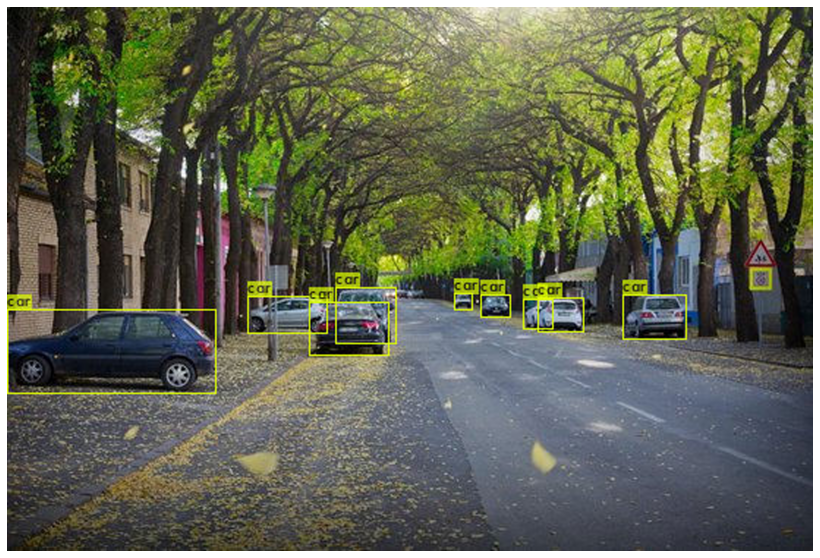

In [6]:
# run darknet with YOLOv4 on your personal image! (note yours will not be called highway.jpg so change the name)
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights ../aa.jpg
imShow('predictions.jpg')

# Method 2: Google Drive

In [0]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive
%cd darknet
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights /mydrive/aa.jpg
imShow('predictions.jpg')

# Download the result

In [0]:
# TO LOCAL MACHINE

download('predictions.jpg')

In [0]:
# TO GOOGLE DRIVE 

!cp predictions.jpg /mydrive/result.jpg


[**Click here for more**](https://github.com/vighc)

**Thanks for the support** 